In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/final-stroke-data.csv')
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [3]:
df.shape


(5109, 11)

In [4]:
print(df.columns.values)


['gender' 'age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status' 'stroke']


In [5]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Plotting Stroke vs No of Patients


In [6]:
df['stroke'].value_counts()


0    4860
1     249
Name: stroke, dtype: int64

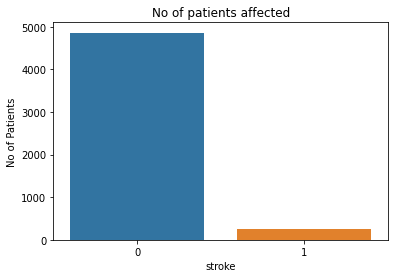

In [7]:
sns.countplot(x=df['stroke'])
plt.title("No of patients affected")
plt.ylabel("No of Patients")
plt.show()

## Finding the relation/dependence of the categorical columns.


In [8]:
print("Gender :", df.gender.unique())
print("Hypertension :", df.hypertension.unique())
print("Heart Disease :", df.heart_disease.unique())
print("Ever Married :", df.ever_married.unique())
print("Work Type :", df.work_type.unique())
print("Residence Type :", df.Residence_type.unique())
print("Smoking Status :", df.smoking_status.unique())

Gender : ['Male' 'Female']
Hypertension : [0 1]
Heart Disease : [1 0]
Ever Married : ['Yes' 'No']
Work Type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence Type : ['Urban' 'Rural']
Smoking Status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


**Stroke vs Gender**


gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Name: stroke, dtype: int64


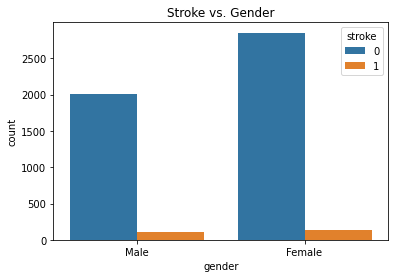

Male Probability : 4.94 %
Female Probability : 5.38 %


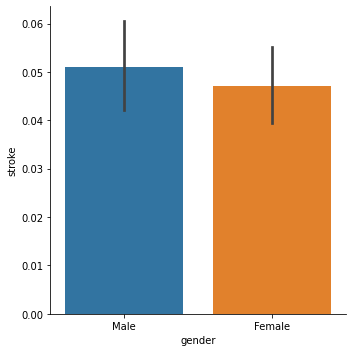

In [9]:
gender_group = df.groupby(['gender'])['stroke'].value_counts()
print(gender_group)

sns.countplot(x=df['gender'], hue=df['stroke'])
plt.title("Stroke vs. Gender")
plt.show()

print(f"Male Probability : {(gender_group['Female'][1]/gender_group['Female'][0])*100:.2f} %")
print(f"Female Probability : {(gender_group['Male'][1]/gender_group['Male'][0])*100:.2f} %")

sns.catplot(x="gender", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** Both male and female have almost equal probability of stroke.


**Stroke vs Hypertension**


hypertension  stroke
0             0         4428
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64


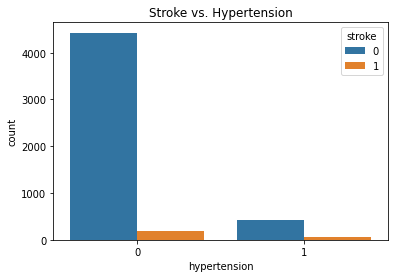

HT- Probability : 4.13 %
HT+ Probability : 15.28 %


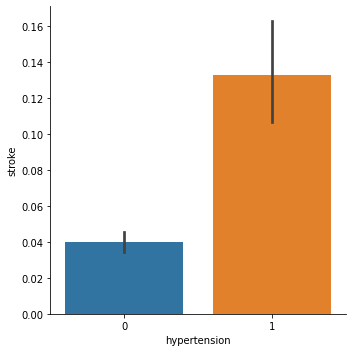

In [10]:
ht_group = df.groupby(df.hypertension)['stroke'].value_counts()
print(ht_group)

sns.countplot(x=df['hypertension'], hue=df['stroke'])
plt.title("Stroke vs. Hypertension")
plt.show()

print(f"HT- Probability : {(ht_group[0][1] / ht_group[0][0])*100:.2f} %")
print(f"HT+ Probability : {(ht_group[1][1] / ht_group[1][0])*100:.2f} %")

sns.catplot(x="hypertension", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** People diagnosed with hypertension have high chances of Stroke.


**Stroke vs Heart Disease**


heart_disease  stroke
0              0         4631
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64


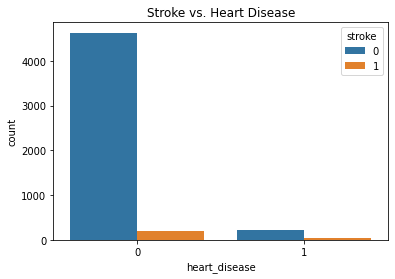

Heart Disease- Probability : 4.36 %
Heart Disease+ Probability : 20.52 %


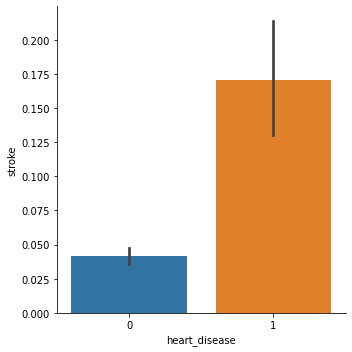

In [11]:
hd_group = df.groupby(df.heart_disease)['stroke'].value_counts()
print(hd_group)

sns.countplot(x=df.heart_disease, hue=df['stroke'])
plt.title("Stroke vs. Heart Disease")
plt.show()

print(f"Heart Disease- Probability : {(hd_group[0][1] / hd_group[0][0])*100:.2f} %")
print(f"Heart Disease+ Probability : {(hd_group[1][1] / hd_group[1][0])*100:.2f} %")

sns.catplot(x="heart_disease", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** People who had heart disease have higher chances of stroke.


**Stroke vs Ever Married**


ever_married  stroke
No            0         1727
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64


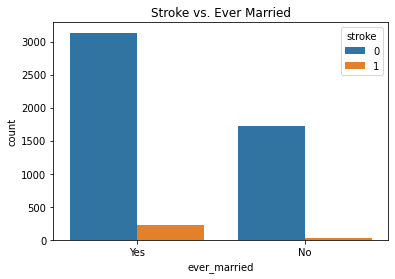

Not Married Probability : 1.68 %
Married Probability : 7.02 %


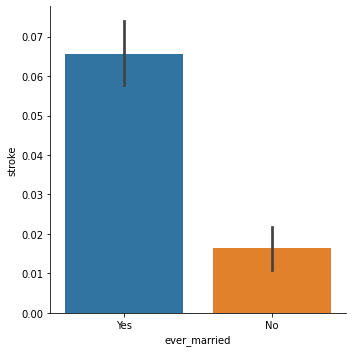

In [12]:
em_group = df.groupby(df.ever_married)['stroke'].value_counts()
print(em_group)

sns.countplot(x=df.ever_married, hue=df['stroke'])
plt.title("Stroke vs. Ever Married")
plt.show()

print(f"Not Married Probability : {(em_group['No'][1] / em_group['No'][0])*100:.2f} %")
print(f"Married Probability : {(em_group['Yes'][1] / em_group['Yes'][0])*100:.2f} %")

sns.catplot(x="ever_married", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** People who are married have higher chances of Stroke.


**Stroke vs Work Type**


work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2775
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64


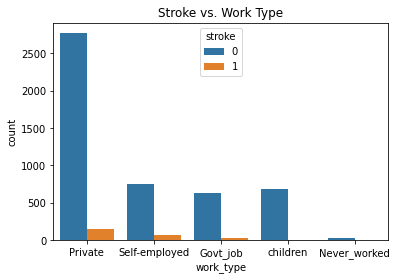

Govt Job Probability : 5.29 %
Private Job Probability : 5.37 %
Self Employed Probability : 8.62 %
Children Probability : 0.29 %


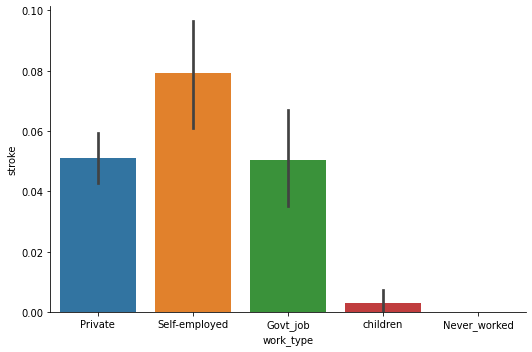

In [13]:
wt_group = df.groupby(df.work_type)['stroke'].value_counts()
print(wt_group)

sns.countplot(x=df.work_type, hue=df['stroke'])
plt.title("Stroke vs. Work Type")
plt.show()

print(f"Govt Job Probability : {(wt_group['Govt_job'][1] / wt_group['Govt_job'][0])*100:.2f} %")
print(f"Private Job Probability : {(wt_group['Private'][1] / wt_group['Private'][0])*100:.2f} %")
print(f"Self Employed Probability : {(wt_group['Self-employed'][1] / wt_group['Self-employed'][0])*100:.2f} %")
print(f"Children Probability : {(wt_group['children'][1] / wt_group['children'][0])*100:.2f} %")

sns.catplot(x="work_type", y="stroke", data=df, kind="bar", aspect=1.5)
plt.show()

**_Inference :_**
<br> So the people who are _Self-Employed_ have _highest_ rate of stroke whereas <br>
_Children_ have the _least_ rate of stroke. <br>
Also those who have _Never worked_ havent had stroke at all.


**Stroke vs Residence Type**


Residence_type  stroke
Rural           0         2399
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64


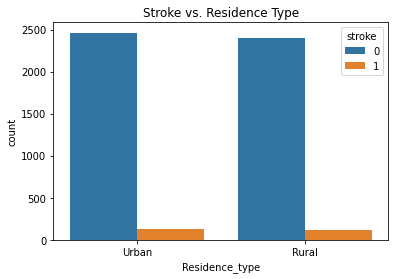

Rural Probability : 4.75 %
Urban Probability : 5.49 %


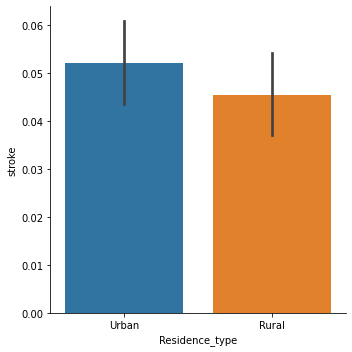

In [14]:
rt_group = df.groupby(df.Residence_type)['stroke'].value_counts()
print(rt_group)

sns.countplot(x=df.Residence_type, hue=df['stroke'])
plt.title("Stroke vs. Residence Type")
plt.show()

print(f"Rural Probability : {(rt_group['Rural'][1] / rt_group['Rural'][0])*100:.2f} %")
print(f"Urban Probability : {(rt_group['Urban'][1] / rt_group['Urban'][0])*100:.2f} %")

sns.catplot(x="Residence_type", y="stroke", data=df, kind="bar")
plt.show()

**_Inference :_** So the Residence Type has almost no difference in Stroke Rate.


**Stroke vs Smoking Status**


smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          814
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64


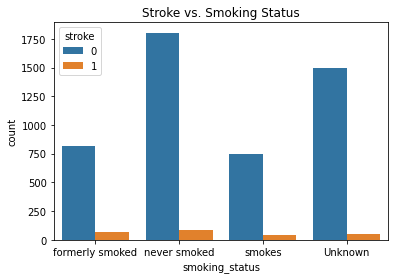

Unknown Probability : 3.14 %
Formerly Smoked Probability : 8.60 %
Never Smoked  Probability : 4.99 %
Smokes Probability : 5.62 %


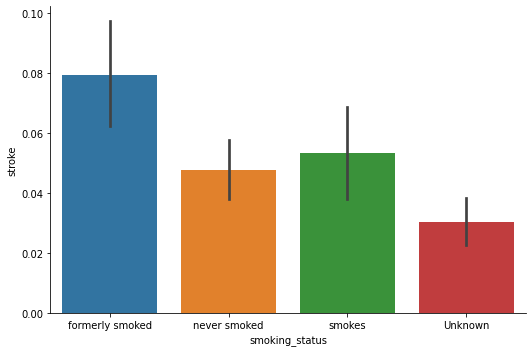

In [15]:
smoke_group = df.groupby(df.smoking_status)['stroke'].value_counts()
print(smoke_group)

sns.countplot(x=df.smoking_status, hue=df['stroke'])
plt.title("Stroke vs. Smoking Status")
plt.show()

print(f"Unknown Probability : {(smoke_group['Unknown'][1] / smoke_group['Unknown'][0])*100:.2f} %")
print(f"Formerly Smoked Probability : {(smoke_group['formerly smoked'][1] / smoke_group['formerly smoked'][0])*100:.2f} %")
print(f"Never Smoked  Probability : {(smoke_group['never smoked'][1] / smoke_group['never smoked'][0])*100:.2f} %")
print(f"Smokes Probability : {(smoke_group['smokes'][1] / smoke_group['smokes'][0])*100:.2f} %")

sns.catplot(x="smoking_status", y="stroke", data=df, kind="bar", aspect=1.5)
plt.show()

**_Inference :_** So the people who had _Formerly Smoked_ have highest rate of stroke, and next people who _Smokes_.


## Finding the relation/dependence of the numerical columns.


**AGE**


In [16]:
df.groupby(['stroke'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,41.974831,22.293056,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


<AxesSubplot:xlabel='stroke', ylabel='age'>

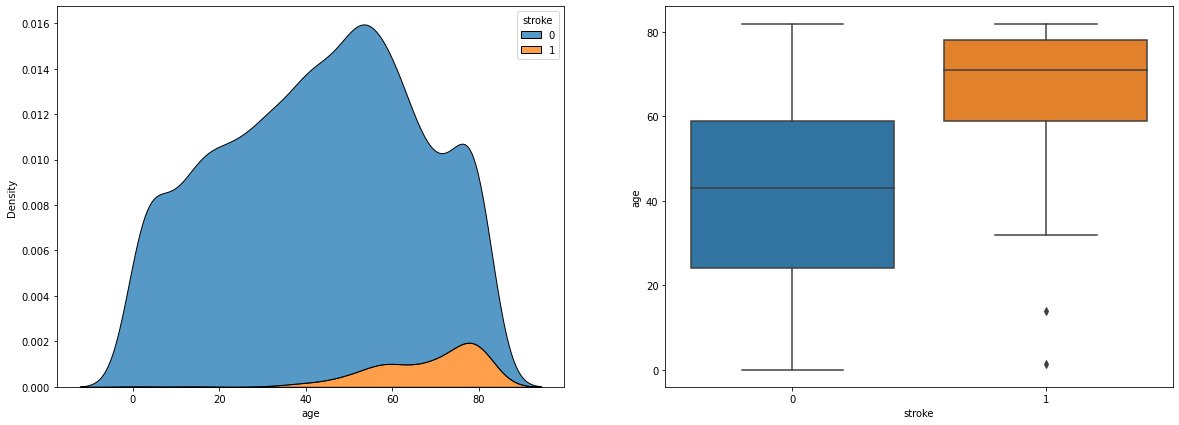

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot(data=df, x="age", hue="stroke", multiple="stack", ax=ax[0])
sns.boxplot(data=df, x="stroke", y="age", ax=ax[1])

**_Inference :_** People around the age range 60 to 80 has higher chances of stroke


**Average Glucose Level**


In [18]:
df.groupby(['stroke'])['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,104.787584,43.847095,55.12,77.12,91.465,112.80,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.220,196.71,271.74


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

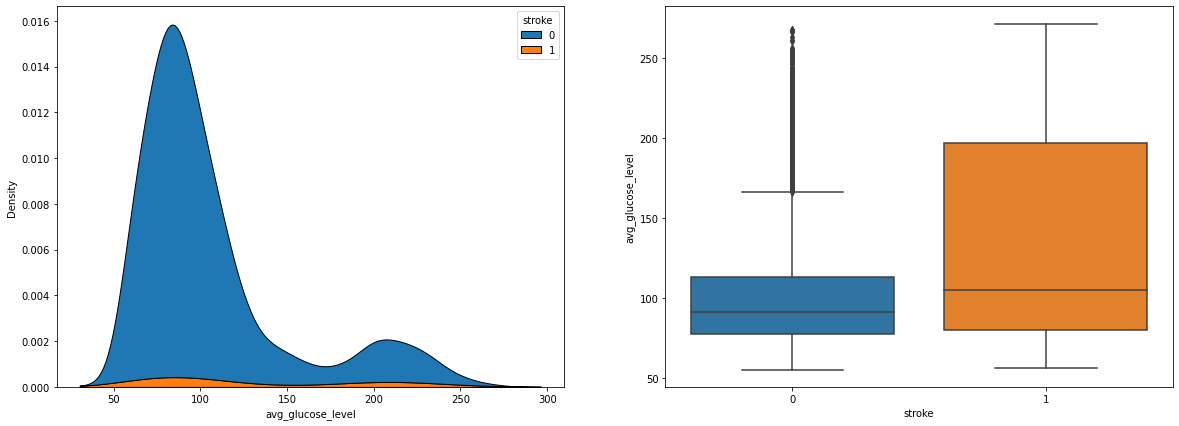

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke",
            multiple="stack", ax=ax[0], alpha=1)
sns.boxplot(data=df, x="stroke", y="avg_glucose_level", ax=ax[1])

**_Inference :_** People with higher _Average Glucose Level_ have higher chances of stroke.


**BMI**


In [20]:
df.groupby(['stroke'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4860.0,28.826710,7.776457,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

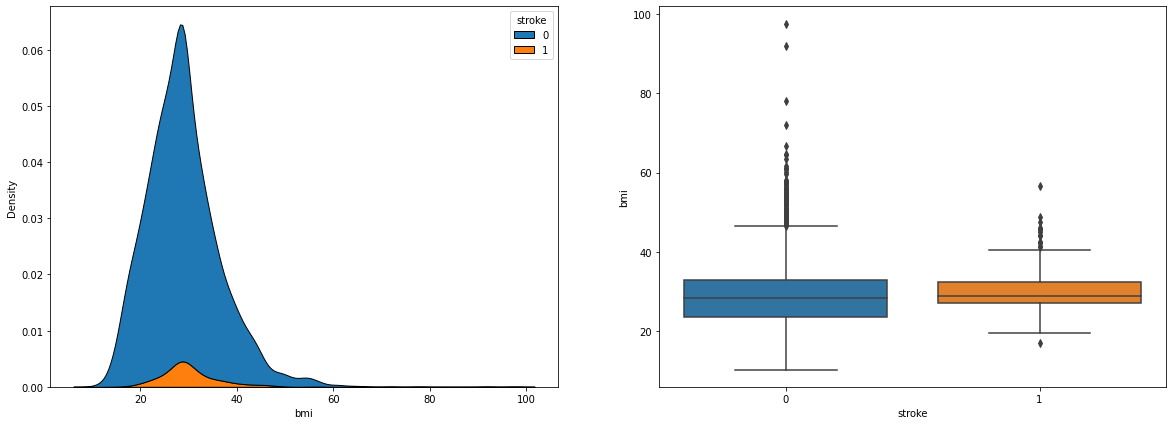

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot(data=df, x="bmi", hue="stroke",
            multiple="stack", ax=ax[0], alpha=1)
sns.boxplot(data=df, x="stroke", y="bmi", ax=ax[1])

**Inference :** BMI index doesnt give any relation with stroke.
